# ISYE 6740 Fall 2020
# Homework 2

##### By: Da Yang (dyang347@gatech.edu)



## 1. PCA: Food consumption in European countries [50 points]

The data **food-consumption.csv** contains 16 countries in Europe and their consumption for 20 food items, such as tea, jam, coffee, yogurt, and others. We will perform principal component analysis to explore the data. In this question, please implement PCA by writing your own code (you can use any basic packages, such as numerical linear algebra, reading data, in your file).

First, we will perform PCA analysis on the data by treating each country's food consumption as their "feature" vectors. In other words, we will find weight vectors to combine 20 food-item consumptions for each country.  

#### 1.1 
(10 points) For this problem of performing PCA on countries by treating each country's food consumption as their "feature" vectors, explain how the data matrix is set-up in this case (e.g., the columns and the rows of the matrix correspond to what). 

#### 1.2
(10 points) Suppose we aim to find top $k$ principal components. Write down the mathematical optimization problem for solving this problem (i.e., PCA optimization problem). Show why the first principal component is obtained by using a weight vector corresponding to the eigenvectors associated with the largest eigenvalue. Explain how to find the rest of the principal components. 

#### 1.3
(10 points) Now assume $k = 2$, i.e., we will find the first two principal components for each data point. Find the weight vectors $w_1$ and $w_2$ to extract these two principal components. Plot these two weight vectors, respectively (e.g., in MATLAB, you can use stem(w) to plot the entries of a vector $w$; similar things can be done in Python). Explain if you find any interesting patterns in the weight vectors. 

#### 1.4
(10 points) Now extract the first two principal components for each data point (thus, this means we will represent each data point using a two-dimensional vector). Draw a scatter plot of two-dimensional representations of the countries using their two principal components. Mark the countries on the lot (you can do this by hand if you want). Please explain any pattern you observe in the scatter plot.

#### 1.5
Now, we will perform PCA analysis on the data by treating country consumptions as "feature" vectors for each food item. In other words, we will now find weight vectors to combine country consumptions for each food item to perform PCA another way.

(10 points) Project data to obtain their two principle components (thus, again each data point -- for each food item -- can be represented using a two-dimensional vector). Draw a scatter plot of food items. Mark the food items on the plot (you can do this by hand if you do not want). Please explain any pattern you observe in the scatter plot.

### Coding

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy.io as spio
import scipy.linalg as ll
import os

In [2]:
# read csv file into DataFrame
df_fd = pd.read_csv('food-consumption.csv')
df_fd.head()

Country  Real coffee  Instant coffee  Tea  Sweetener  Biscuits  \
0  Germany           90              49   88         19        57   
1    Italy           82              10   60          2        55   
2   France           88              42   63          4        76   
3  Holland           96              62   98         32        62   
4  Belgium           94              38   48         11        74   

   Powder soup  Tin soup  Potatoes  Frozen fish  ...  Apples  Oranges  \
0           51        19        21           27  ...      81       75   
1           41         3         2            4  ...      67       71   
2           53        11        23           11  ...      87       84   
3           67        43         7           14  ...      83       89   
4           37        23         9           13  ...      76       76   

   Tinned fruit  Jam  Garlic  Butter  Margarine  Olive oil  Yoghurt  \
0            44   71      22      91         85         74       30   
1             9   46      80      66         24         94        5   
2            40   45      88      94         47         36       57   
3            61   81      15      31         97         13       53   
4            42   57      29      84         80         83       20   

   Crisp bread  
0           26  
1           18  
2            3  
3           15  
4            5  

[5 rows x 21 columns]

In [9]:
data = df_fd.values

In [10]:
data

array([[90, 49, 88, 19, 57, 51, 19, 21, 27, 21, 81, 75, 44, 71, 22, 91,
        85, 74, 30, 26],
       [82, 10, 60,  2, 55, 41,  3,  2,  4,  2, 67, 71,  9, 46, 80, 66,
        24, 94,  5, 18],
       [88, 42, 63,  4, 76, 53, 11, 23, 11,  5, 87, 84, 40, 45, 88, 94,
        47, 36, 57,  3],
       [96, 62, 98, 32, 62, 67, 43,  7, 14, 14, 83, 89, 61, 81, 15, 31,
        97, 13, 53, 15],
       [94, 38, 48, 11, 74, 37, 23,  9, 13, 12, 76, 76, 42, 57, 29, 84,
        80, 83, 20,  5],
       [97, 61, 86, 28, 79, 73, 12,  7, 26, 23, 85, 94, 83, 20, 91, 94,
        94, 84, 31, 24],
       [27, 86, 99, 22, 91, 55, 76, 17, 20, 24, 76, 68, 89, 91, 11, 95,
        94, 57, 11, 28],
       [72, 26, 77,  2, 22, 34,  1,  5, 20,  3, 22, 51,  8, 16, 89, 65,
        78, 92,  6,  9],
       [55, 31, 61, 15, 29, 33,  1,  5, 15, 11, 49, 42, 14, 41, 51, 51,
        72, 28, 13, 11],
       [73, 72, 85, 25, 31, 69, 10, 17, 19, 15, 79, 70, 46, 61, 64, 82,
        48, 61, 48, 30],
       [97, 13, 93, 31, 61, 43

In [11]:
data1 = data.T
mu1 = np.mean(data1, axis=0)

In [12]:
mu1.shape

(16,)

In [13]:
mu1

array([52.05, 37.05, 47.85, 51.65, 45.55, 59.6 , 56.85, 34.9 , 31.4 ,
       50.25, 51.65, 49.75, 43.1 , 41.3 , 41.2 , 39.45])

In [26]:
mu2 = np.tile(mu1, [20,1])

In [27]:
mu2.shape

(20, 16)

In [304]:
# show dataframe dimension
df_fd.shape

(16, 21)

In [305]:
df_fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country         16 non-null     object
 1   Real coffee     16 non-null     int64 
 2   Instant coffee  16 non-null     int64 
 3   Tea             16 non-null     int64 
 4   Sweetener       16 non-null     int64 
 5   Biscuits        16 non-null     int64 
 6   Powder soup     16 non-null     int64 
 7   Tin soup        16 non-null     int64 
 8   Potatoes        16 non-null     int64 
 9   Frozen fish     16 non-null     int64 
 10  Frozen veggies  16 non-null     int64 
 11  Apples          16 non-null     int64 
 12  Oranges         16 non-null     int64 
 13  Tinned fruit    16 non-null     int64 
 14  Jam             16 non-null     int64 
 15  Garlic          16 non-null     int64 
 16  Butter          16 non-null     int64 
 17  Margarine       16 non-null     int64 
 18  Olive oil   

Perform PCA analysis on contries by treating each country's food consumption as their feature vectors. There will be 16 vectors for 16 countries

$$ x^i \in \mathbb R^{20}, i = 1,2,...16 $$

In [8]:
# Create 16*20 ndarray, 16 vectors with 20 features
# set country as index
df_fd = df_fd.set_index('Country')
df_fd.head()

Real coffee  Instant coffee  Tea  Sweetener  Biscuits  Powder soup  \
Country                                                                       
Germany           90              49   88         19        57           51   
Italy             82              10   60          2        55           41   
France            88              42   63          4        76           53   
Holland           96              62   98         32        62           67   
Belgium           94              38   48         11        74           37   

         Tin soup  Potatoes  Frozen fish  Frozen veggies  Apples  Oranges  \
Country                                                                     
Germany        19        21           27              21      81       75   
Italy           3         2            4               2      67       71   
France         11        23           11               5      87       84   
Holland        43         7           14              14      83       89   
Belgium        23         9           13              12      76       76   

         Tinned fruit  Jam  Garlic  Butter  Margarine  Olive oil  Yoghurt  \
Country                                                                     
Germany            44   71      22      91         85         74       30   
Italy               9   46      80      66         24         94        5   
France             40   45      88      94         47         36       57   
Holland            61   81      15      31         97         13       53   
Belgium            42   57      29      84         80         83       20   

         Crisp bread  
Country               
Germany           26  
Italy             18  
France             3  
Holland           15  
Belgium            5

In [17]:
# Create matrix X
# X has 16 data points with 20 dimensions for 20 food items
# To easily understand, transpose dataframe into shape 20 * 16
df_fd = df_fd.T

In [18]:
d, m = df_fd.shape

In [19]:
df_fd.head()

Country         Germany  Italy  France  Holland  Belgium  Luxembourg  England  \
Real coffee          90     82      88       96       94          97       27   
Instant coffee       49     10      42       62       38          61       86   
Tea                  88     60      63       98       48          86       99   
Sweetener            19      2       4       32       11          28       22   
Biscuits             57     55      76       62       74          79       91   

Country         Portugal  Austria  Switzerland  Sweden  Denmark  Norway  \
Real coffee           72       55           73      97       96      92   
Instant coffee        26       31           72      13       17      17   
Tea                   77       61           85      93       92      83   
Sweetener              2       15           25      31       35      13   
Biscuits              22       29           31      61       66      62   

Country         Finland  Spain  Ireland  
Real coffee          98     70       30  
Instant coffee       12     40       52  
Tea                  84     40       99  
Sweetener            20     18       11  
Biscuits             64     62       80

##### Perform PCA on countries

In [20]:
# Step 1: Calculate mu
mu = df_fd.mean(axis=1)

In [21]:
# Normalize by minus mu to have zero mean matrix
xc = df_fd.sub(mu, axis=0)
xc.shape

(20, 16)

In [22]:
# mean of each features across x is zero
xc.mean(axis=1)

Real coffee       0.0
Instant coffee    0.0
Tea               0.0
Sweetener         0.0
Biscuits          0.0
Powder soup       0.0
Tin soup          0.0
Potatoes          0.0
Frozen fish       0.0
Frozen veggies    0.0
Apples            0.0
Oranges           0.0
Tinned fruit      0.0
Jam               0.0
Garlic            0.0
Butter            0.0
Margarine         0.0
Olive oil         0.0
Yoghurt           0.0
Crisp bread       0.0
dtype: float64

In [313]:
xc.head()

Country         Germany    Italy   France  Holland  Belgium  Luxembourg  \
Real coffee     11.4375   3.4375   9.4375  17.4375  15.4375     18.4375   
Instant coffee   9.7500 -29.2500   2.7500  22.7500  -1.2500     21.7500   
Tea              9.5000 -18.5000 -15.5000  19.5000 -30.5000      7.5000   
Sweetener        1.0000 -16.0000 -14.0000  14.0000  -7.0000     10.0000   
Biscuits        -3.6875  -5.6875  15.3125   1.3125  13.3125     18.3125   

Country         England  Portugal  Austria  Switzerland   Sweden  Denmark  \
Real coffee    -51.5625   -6.5625 -23.5625      -5.5625  18.4375  17.4375   
Instant coffee  46.7500  -13.2500  -8.2500      32.7500 -26.2500 -22.2500   
Tea             20.5000   -1.5000 -17.5000       6.5000  14.5000  13.5000   
Sweetener        4.0000  -16.0000  -3.0000       7.0000  13.0000  17.0000   
Biscuits        30.3125  -38.6875 -31.6875     -29.6875   0.3125   5.3125   

Country          Norway  Finland    Spain  Ireland  
Real coffee     13.4375  19.4375  -8.5625 -48.5625  
Instant coffee -22.2500 -27.2500   0.7500  12.7500  
Tea              4.5000   5.5000 -38.5000  20.5000  
Sweetener       -5.0000   2.0000   0.0000  -7.0000  
Biscuits         1.3125   3.3125   1.3125  19.3125

From the lecture note, calculate matrix C:

$$ C = \frac{1}{m}\sum(x^i-\mu)(x^i-\mu)^T$$

In [314]:
# Calculate covariance matrix
# Cov should be 20*20 based on the 20 features
C= np.dot(xc, xc.T)/m
C.shape

(20, 20)

In [315]:
C.sum()

23785.875

In [316]:
# Calcualte cov in numpy package and set ddof = 0 to use the biased estimation to follow the lecture approach

df_c = np.cov(xc, ddof=0)

In [317]:
df_c.shape

(20, 20)

In [318]:
# The sum equals to the sum of C calculated from formula
# It means the result of function cov() equals the result of matrix multiplication - for learning perspective
# Will use df_c as the covariance matrix
df_c.sum()

23785.875

In [612]:
# Step 2:
# Perform SVD on matrix C because np.svd() will generate eigenvalues in order from largest to smallest
# For positive semi-definite (PSD) matrix, eig() and svd() are equivalent b

U, Sigma, Vh = ll.svd(df_c)

#### 1.3 

(10 points) Now assume $k = 2$, i.e., we will find the first two principal components for each data point. Find the weight vectors $w_1$ and $w_2$ to extract these two principal components. Plot these two weight vectors, respectively

In [320]:
k = 2
# U as eigenvector w
U = U.real

# Eigenvalues
Sigma = Sigma.real

<StemContainer object of 3 artists>

<Figure size 864x576 with 0 Axes>

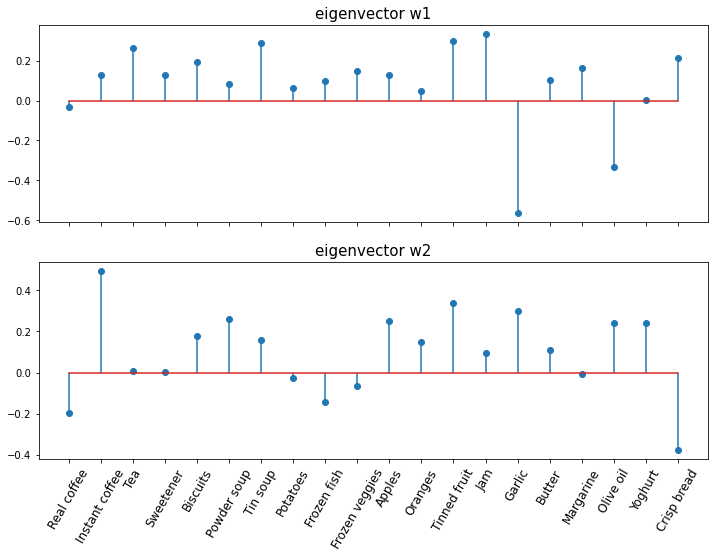

In [628]:
# 1.3 Plot the first two weight vectors
plt.rcParams["figure.figsize"]=12,8
plt.figure()
f, (ax1, ax2) = plt.subplots(2,1, sharex=True)
ax2.set_xticks(list(range(20)))
ax2.set_xticklabels(xc.index, fontsize=12, rotation=60)
ax2.xaxis.labelpad = 0
ax1.set_title('eigenvector w1', fontsize=15)
ax1.stem(U[:,0], use_line_collection = True)
ax2.set_title('eigenvector w2', fontsize=15)
ax2.stem(U[:,1], use_line_collection = True)

In [322]:
# 1.4 Calculate the first two principle components
# z = w1.T * normalized x / square root of eigenvalue Sigma

Sigma = Sigma.reshape(-1,1)

dim1 = np.dot(U[:,0].T, xc)/math.sqrt(Sigma[0])
dim2 = np.dot(U[:,1].T, xc)/math.sqrt(Sigma[1])

In [323]:
# Mark the label as countries
label = xc.columns.tolist()

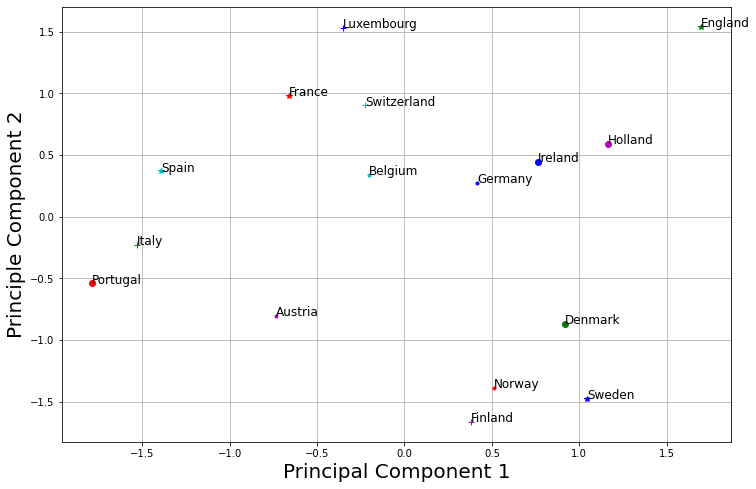

In [324]:
# 1.4 Plot first two pcinciple components from matrix z
color_string = 'bgrmck'
marker_string = '.+*o'
food_fig = plt.figure()
plt.grid(which='both')
for i in range(m):
    color = color_string[i % 5]
    marker = marker_string[i % 4]
    x = color + marker
    food_fig.gca().plot(dim1[i], dim2[i],x)
    plt.annotate(label[i], (dim1[i], dim2[i]), fontsize=12)

    

plt.xlabel('Principal Component 1', fontsize=20)
plt.ylabel('Principle Component 2', fontsize=20)
plt.show()

#### 1.5 PCA on food items with countries as features

In this scenario, there will be 20 data points as 20 different food items, each data point has 16 features as 16 different countries consumption

In [325]:
df_cy = pd.read_csv('food-consumption.csv')
df_cy = df_cy.set_index('Country')
df_cy.head()

Real coffee  Instant coffee  Tea  Sweetener  Biscuits  Powder soup  \
Country                                                                       
Germany           90              49   88         19        57           51   
Italy             82              10   60          2        55           41   
France            88              42   63          4        76           53   
Holland           96              62   98         32        62           67   
Belgium           94              38   48         11        74           37   

         Tin soup  Potatoes  Frozen fish  Frozen veggies  Apples  Oranges  \
Country                                                                     
Germany        19        21           27              21      81       75   
Italy           3         2            4               2      67       71   
France         11        23           11               5      87       84   
Holland        43         7           14              14      83       89   
Belgium        23         9           13              12      76       76   

         Tinned fruit  Jam  Garlic  Butter  Margarine  Olive oil  Yoghurt  \
Country                                                                     
Germany            44   71      22      91         85         74       30   
Italy               9   46      80      66         24         94        5   
France             40   45      88      94         47         36       57   
Holland            61   81      15      31         97         13       53   
Belgium            42   57      29      84         80         83       20   

         Crisp bread  
Country               
Germany           26  
Italy             18  
France             3  
Holland           15  
Belgium            5

No need to transpose, the dataframe represents 20 data points in columns and 16 features in rows already

In [326]:
d1, m1 = df_cy.shape

In [327]:
# Step 1: Calculate mu
mu_c = df_cy.mean(axis=1)
mu_c

Country
Germany        52.05
Italy          37.05
France         47.85
Holland        51.65
Belgium        45.55
Luxembourg     59.60
England        56.85
Portugal       34.90
Austria        31.40
Switzerland    50.25
Sweden         51.65
Denmark        49.75
Norway         43.10
Finland        41.30
Spain          41.20
Ireland        39.45
dtype: float64

In [328]:
# Normalize by minus mu to have zero mean matrix
xc_c = df_cy.sub(mu_c, axis=0)
xc_c.shape

(16, 20)

In [329]:
# mean of each features across x is zero
xc_c.mean(axis=1)

Country
Germany        2.842171e-15
Italy          2.842171e-15
France        -1.421085e-15
Holland        1.065814e-15
Belgium        2.842171e-15
Luxembourg    -1.421085e-15
England       -7.105427e-16
Portugal       1.421085e-15
Austria        1.421085e-15
Switzerland    0.000000e+00
Sweden         1.421085e-15
Denmark        0.000000e+00
Norway        -1.421085e-15
Finland        2.842171e-15
Spain         -2.842171e-15
Ireland       -2.842171e-15
dtype: float64

In [630]:
# Calcualte cov in numpy package and set ddof = 0 to use the biased estimation to follow the lecture approach
df_x = np.cov(xc_c, ddof=0)

In [631]:
U1, Sigma1, Vh1 = ll.svd(df_x)

k = 2
# U as eigenvector w
U1 = U1.real

# Eigenvalues
Sigma1 = Sigma1.real

In [632]:
df_x.shape

(16, 16)

<StemContainer object of 3 artists>

<Figure size 864x576 with 0 Axes>

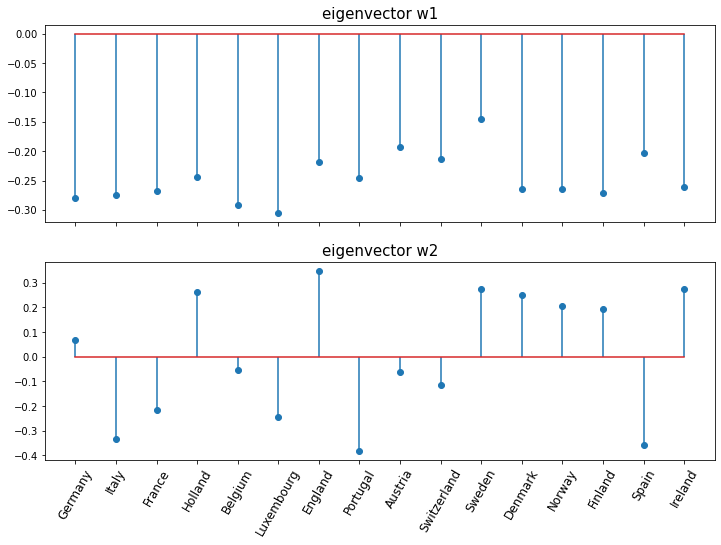

In [633]:
# 1.5 Plot the first two weight vectors
plt.rcParams["figure.figsize"]=12,8
plt.figure()
f, (ax1, ax2) = plt.subplots(2,1, sharex=True)
ax2.set_xticks(list(range(20)))
ax2.set_xticklabels(xc_c.index, fontsize=12, rotation=60)
ax2.xaxis.labelpad = 0
ax1.set_title('eigenvector w1', fontsize=15)
ax1.stem(U1[:,0], use_line_collection = True)
ax2.set_title('eigenvector w2', fontsize=15)
ax2.stem(U1[:,1], use_line_collection = True)

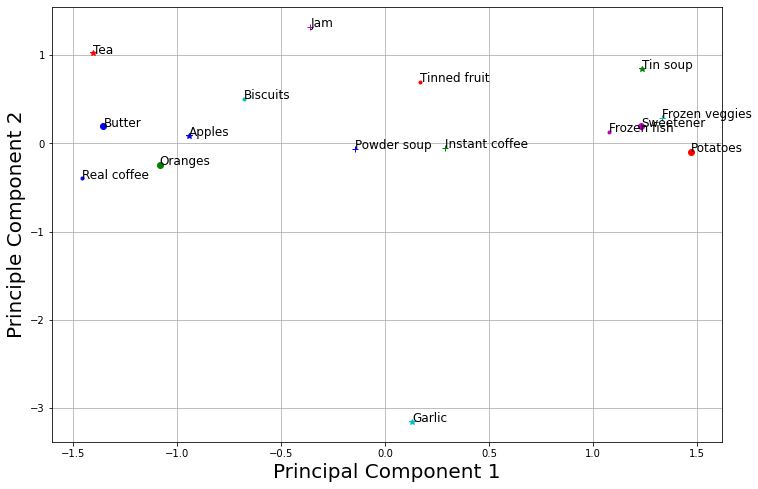

In [367]:
# Calculate the first two principle components
# z = w1.T * normalized x / square root of eigenvalue Sigma

Sigma1 = Sigma1.reshape(-1,1)

dim1_c = np.dot(U1[:,0].T, xc_c)/math.sqrt(Sigma1[0])
dim2_c = np.dot(U1[:,1].T, xc_c)/math.sqrt(Sigma1[1])


# Mark the label as food items
label = xc_c.columns.tolist()

# Plot first two pcinciple components from matrix z
color_string = 'bgrmck'
marker_string = '.+*o'
food_fig = plt.figure()
plt.grid(which='both')
for i in range(m):
    color = color_string[i % 5]
    marker = marker_string[i % 4]
    x = color + marker
    food_fig.gca().plot(dim1_c[i], dim2_c[i],x)
    plt.annotate(label[i], (dim1_c[i], dim2_c[i]), fontsize=12)

    

plt.xlabel('Principal Component 1', fontsize=20)
plt.ylabel('Principle Component 2', fontsize=20)
plt.show()

## 2. Order of faces using ISOMAP [50 points]

This question aims to reproduce the ISOMAP algorithm results in the original paper for ISOMAP, J.B. Tenenbaum, V. de Silva, and J.C. Langford, Science 290 (2000) 2319-2323 that we have also seen in the lecture as an exercise (isn't this exciting to go through the process of generating results for a high-impact research paper!) 


The file **isomap.mat** (or **isomap.dat**) contains 698 images, corresponding to different poses of the same face. Each image is given as a 64 $\times$ 64 luminosity map, hence represented as a vector in $\mathbb R^{4096}$. This vector is stored as a row in the file. [This is one of the datasets used in the original paper] In this question, you are expected to implement the ISOMAP algorithm by coding it up yourself. You may use the provided functions in **ShortestPath.zip** to find the shortest path as required by one step of the algorithm. 

Choose the Euclidean distance (i.e., in this case, a distance in $\mathbb R^{4096}$) to construct the nearest neighbor graph—vertices corresponding to the images. Construct a similarity graph with vertices corresponding to the images, and tune the threshold $\epsilon$ so that each node has *at least* 100 neighbors (this approach corresponds to the so-called $\epsilon$-Isomap).



### 2.1
(10 points) Visualize the similarity graph (you can either show the adjacency matrix, or similar to the lecture slides, visualize the graph using graph visualization packages such as Gephi (https://gephi.org) and illustrate a few images corresponds to nodes at different parts of the graph, e.g., mark them by hand or use software packages).

### 2.2
(20 points) Implement the ISOMAP algorithm yourself to obtain a $k = 2$-dimensional embedding. This means, each picture is represented by a two-dimensional vector ($Z$ in the lecture), which we called 'embedding' of pictures. Plot the embeddings using a scatter plot, similar to the plots in lecture slides. Find a few images in the embedding space and show what these images look like. Comment on do you see any visual similarity among them and their arrangement, similar to what you seen in the paper?

### 2.3
(10 points) Now choose $\ell_1$ distance (or Manhattan distance) between images (recall the definition from 'Clustering' lecture)). Repeat the steps above. Use $\epsilon$-ISOMAP to obtain a $k=2$ dimensional embedding. Present a plot of this embedding. Do you see any difference by choosing a different similarity measure by comparing results in Part (b) and Part (c)? 

### 2.4
(10 points) Perform PCA (you can now use your implementation written in Question 1) on the images and project them into the top 2 principal components. Again show them on a scatter plot. Explain whether or you see a more meaningful projection using ISOMAP than PCA. 

In [513]:
import networkx as nx
from scipy.spatial import distance
from matplotlib import pyplot as plt

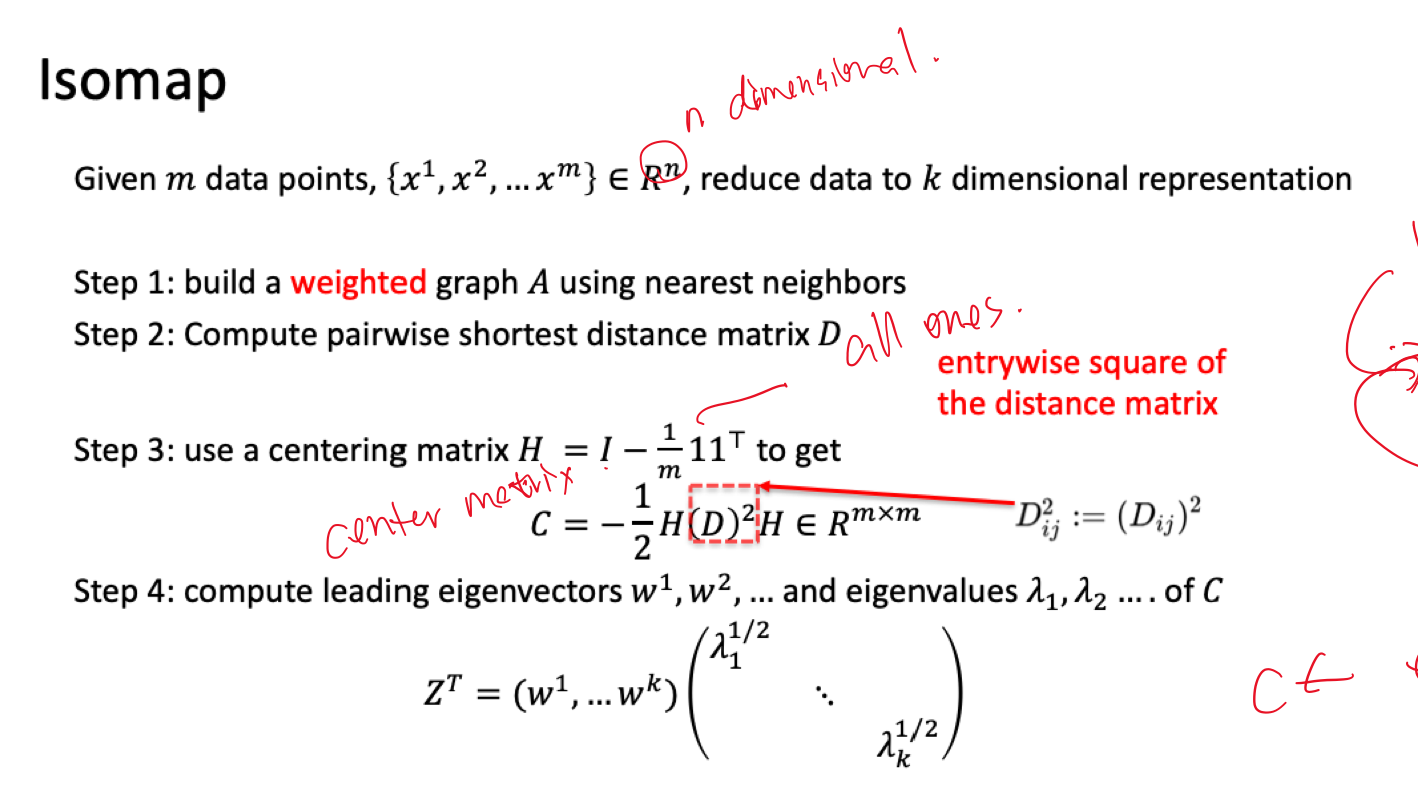

### Step 1: Construct at least k nearest neighbor for ISOMAP

-- Notes from Piazza: 

supposed to use $\epsilon$-ISOMAP <br>
Use uniform threshold across all graph will lead to a symmetric A matrix. We need A and D symmetrical because we assume the graph is undirected



In [17]:
# use scipy.io to read mat file
# read the image array
arr_img = spio.loadmat('isomap.mat')['images']
arr_img

array([[0.01617647, 0.01617647, 0.01617647, ..., 0.01617647, 0.01617647,
        0.01617647],
       [0.01617647, 0.01617647, 0.01617647, ..., 0.01617647, 0.01617647,
        0.01617647],
       [0.01617647, 0.01617647, 0.01617647, ..., 0.01617647, 0.01617647,
        0.01617647],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [125]:
# shape of array, per question, the array represents 698 images of dimension 64*64 (4096)
arr_img.shape

(4096, 698)

In [228]:
# Calculate the pairwise distance between all the points, supposed to be 698 * 698
# function distance.cdist use MA by N and MB by N to represent N dimension. In this case, N = 4096.
# Transpose arr_img first so it is 698*4096 showing the correct dimension
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html
arr_img_t = arr_img.T

# Calculate the distance between all the 698 points
dist_mx = distance.cdist(arr_img_t, arr_img_t, 'euclidean')

In [229]:
# Validate the shape to make sure it generates matrix 698*698
dist_mx.shape

(698, 698)

In [230]:
dist_mx.dtype

dtype('float64')

In [387]:
# Find epsilon to make sure each node has at least 100 neighbors
# Calcualte the 100th smallest distance of each data point, and use the max of all 100th distance as epsilon. 
# argsort is sorting from smallest to largest
# Because the smallest is 0 for self distance, so use 101th distance to make sure each node has 100 neighbers excluding itself

epsilon = 0
ep_ls = []
for i in range(dist_mx.shape[0]):
    ep_ls.append(dist_mx[i][dist_mx[i].argsort()][10])

epsilon = max(ep_ls)
epsilon

14.550273104664157

In [388]:
# Build adjacent matrix A, if the distance between two nodes is less than the threshold epsilon
# the edge is 1 which means two nodes are connected
A = np.dot(1, dist_mx <= epsilon)

In [389]:
W = np.multiply(A, dist_mx)

In [390]:
W

array([[0.        , 0.        , 6.74323967, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [6.74323967, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [391]:
# Piazza notes: Dij should be infinity if the node is disconnected and is isolated instead of 0
# replace all the 0 in original matrix with infinity to make sure the 0s won't be included in the shortest distance
W = np.where(W==0, np.inf, W)

In [519]:
# Assert each node has at least 100 edges
assert (W != np.inf).sum(axis=1).min() == 10

### Step 2: Compute shortest distance matrix D

In [394]:
# import function from the file ShortestPath

def Matrix_D(W):
    # Generate Graph and Obtain Matrix D, \\
    # from weight matrix W defining the weight on the edge between each pair of nodes.
    # Note that you can assign sufficiently large weights to non-existing edges.

    n = np.shape(W)[0]
    Graph = nx.DiGraph()
    for i in range(n):
        for j in range(n):
            Graph.add_weighted_edges_from([(i,j,min(W[i,j], W[j,i]))])

    res = dict(nx.all_pairs_dijkstra_path_length(Graph))
    D = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            D[i,j] = res[i][j]
    np.savetxt('D.csv', D)
    return D

In [395]:
# Use the function provided
D = Matrix_D(W)

In [625]:
def create_matrix_e(arr_img_t, k_neighbor = 10):
    
    # Calcualte Manhattan distance between all arrays, which is the euclidean distance
    dist_mx = distance.cdist(arr_img_t, arr_img_t, 'euclidean')
    
    
    # find the distance that meet at least k neighbors of each point
    epsilon = 0
    ep_ls = []
    for i in range(dist_mx.shape[0]):
        ep_ls.append(dist_mx[i][dist_mx[i].argsort()][k_neighbor])
        epsilon = max(ep_ls)
    
    # unweighted matrix of nodes
    A = np.dot(1, dist_mx <= epsilon)
    
    # weighted matrix of nodes 
    W = np.multiply(A, dist_mx) 
    W = np.where(W==0, np.inf, W)
    assert (W != np.inf).sum(axis=1).min() == k_neighbor
    
    # calcualte the shortest distance D
    D = Matrix_D(W)
    
    # original adjacent matrix B with disconneted node distance as 0
    B = np.where(W==np.inf, 0, W)
    
    
    # Calcualte Matrix H
    m = D.shape[0]
    I = np.eye(N = D.shape[0])
    H = I - 1/m*(np.ones(D.shape))
    
    # Matrix C
    C = -1/2 * (H @ np.square(D) @ H)
    
    # Perform SVD to calcualte eigenvectors and eigenvalue
    w, lam, _= np.linalg.svd(C)
    
    Z1 = w[:,0]*np.sqrt(lam[0]).T
    Z2 = w[:,1]*np.sqrt(lam[1]).T
    Z = np.vstack((Z1, Z2)).T
    
    
    # return matrix D as the shortest distance matrix
    # return B as the original adjacent matrix (before replace 0 with inf)
    # return Z as the final first 2 embeddings
    return D, B, Z

### Answer 2.1

Playing with different K value to see different results of the final embedding scatter point.

#### K = 100

In [627]:
D_100,B_100,Z_100 = create_matrix_e(arr_img_t, k_neighbor = 100)

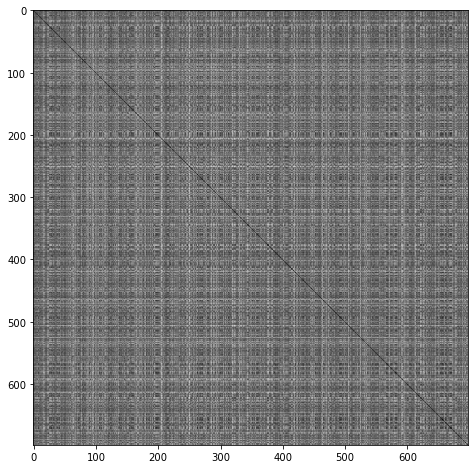

In [637]:
# Plot the shortest distance matrix
plt.imshow(D_100, cmap='gray')

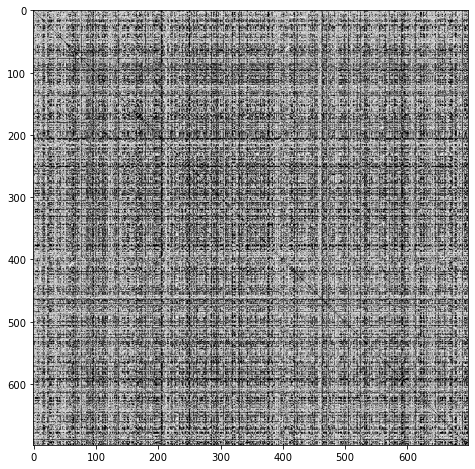

In [636]:
### Plot the adjacent matrix
plt.imshow(B_100, cmap='gray')

Text(0.5, 1.0, 'First two embeddings using Euclidean Distance, K=100')

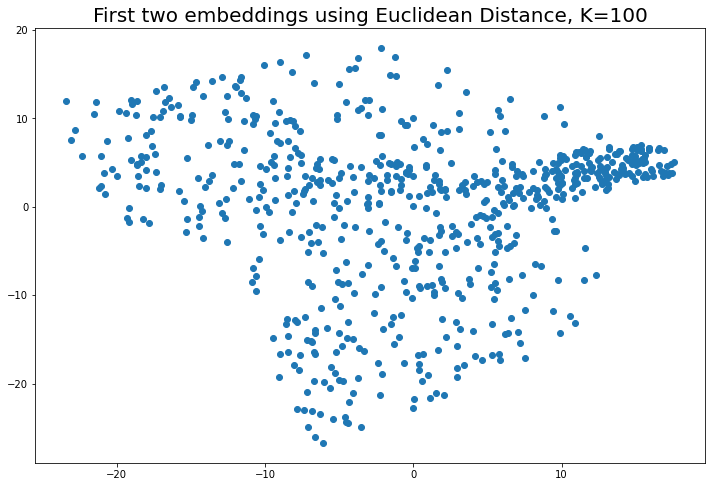

In [640]:
plt.scatter(Z_100[:,0], Z_100[:,1])

plt.title('First two embeddings using Euclidean Distance, K=100', fontsize=20)

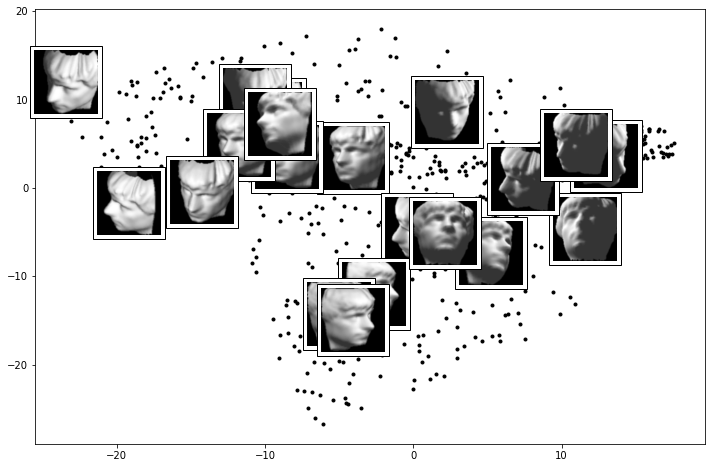

In [643]:
plot_components(Z_100)

#### Playing with different K value to see different results of the final embedding scatter point.

#### K = 10

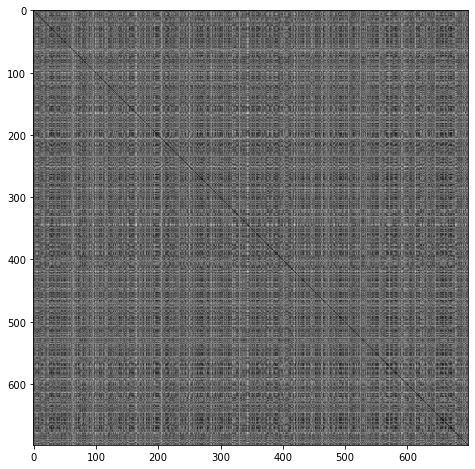

In [641]:
# Plot the shortest distance matrix
plt.imshow(D, cmap='gray')

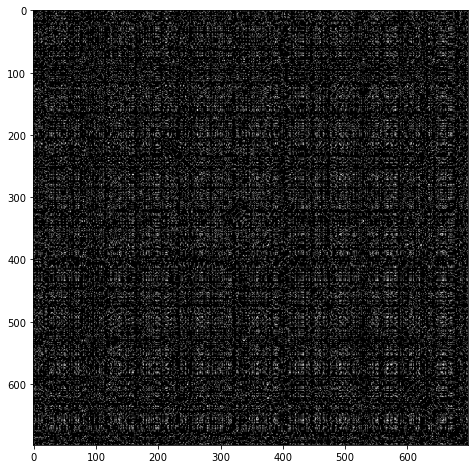

In [642]:
# Plot adjacent matrix W
# The original W has most of the points as infinity, in order to show good plot, replace inf with 0
B = np.where(W==np.inf, 0, W)
plt.imshow(B, cmap='gray')




### Step 3: Implement ISOMAP - use centering matrix H and calcualte matrix C

$$ H = I - \frac{1}{m}11^T$$

$$ C = -\frac{1}{2}H(D)^2H $$

In [412]:
D.shape

(698, 698)

In [413]:
# Matrix H
m = D.shape[0]
I = np.eye(N = D.shape[0])
H = I - 1/m*(np.ones(D.shape))

In [414]:
# Matrix C
C = -1/2 * (H @ np.square(D) @ H)

### Step 4: Compute leading eigenvectors and eigenvalues of C, and calcualte Z

$$ Z^k = w^k * \lambda^{1/2}_{k} $$

### Answer 2.2

In [415]:
# Use svd to compute eigenvectors and eigenvalues
# the result is sorted from largest to smallest
w, lam, _= np.linalg.svd(C)

In [483]:
# k = 2, calculate the first two vectors of Z
Z1 = w[:,0]*np.sqrt(lam[0]).T
Z2 = w[:,1]*np.sqrt(lam[1]).T

In [484]:
Z = np.vstack((Z1, Z2)).T

Text(0.5, 1.0, 'First two embeddings using Euclidean Distance, K=10')

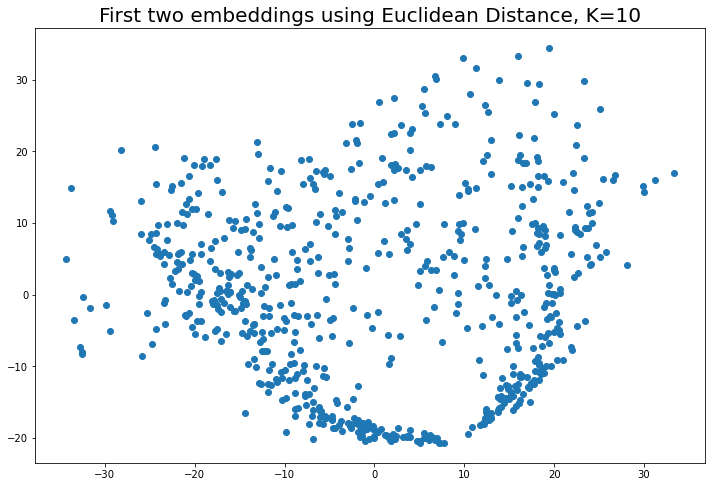

In [644]:
plt.scatter(Z1, Z2)

plt.title('First two embeddings using Euclidean Distance, K=10', fontsize=20)

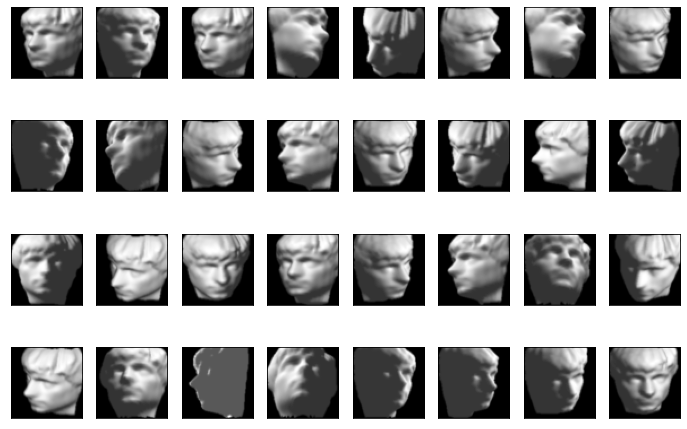

In [486]:
# Example of some images
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(arr_img.T[i,:].reshape(64,64).T, cmap='gray')

In [511]:
# knowledge learned: https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html
    
from matplotlib import offsetbox

def plot_components(Z, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    ax.plot(Z[:,0], Z[:,1], '.k')
    
    
    min_dist_2 = (thumb_frac * max(Z.max(0) - Z.min(0))) ** 2
    shown_images = np.array([2 * Z.max(0)])
    for i in range(0,Z.shape[0],35):
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(arr_img.T[i,:].reshape(64,64).T, cmap=cmap),
                                    Z[i])
        ax.add_artist(imagebox)

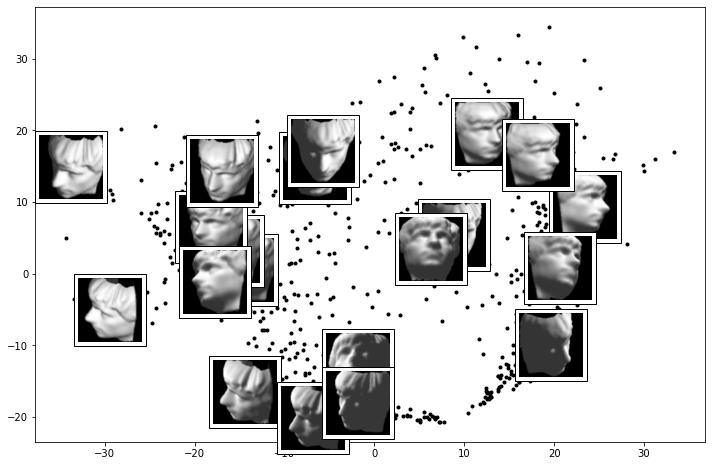

In [512]:
plot_components(Z)

### Answer 2.3 - Use Manhattan

In [532]:
def create_matrix_a(arr_img_t, k_neighbor = 10):
    
    # Calcualte Manhattan distance between all arrays, which is the p=1 minkowski distance
    dist_mx = distance.cdist(arr_img_t, arr_img_t, 'minkowski', 1)
    
    
    # find the distance that meet at least k neighbors of each point
    epsilon = 0
    ep_ls = []
    for i in range(dist_mx.shape[0]):
        ep_ls.append(dist_mx[i][dist_mx[i].argsort()][k_neighbor])
        epsilon = max(ep_ls)
    
    # unweighted matrix of nodes
    A = np.dot(1, dist_mx <= epsilon)
    
    # weighted matrix of nodes 
    W = np.multiply(A, dist_mx) 
    W = np.where(W==0, np.inf, W)
    assert (W != np.inf).sum(axis=1).min() == k_neighbor
    
    # calcualte the shortest distance D
    D = Matrix_D(W)
    
    # original adjacent matrix B with disconneted node distance as 0
    B = np.where(W==np.inf, 0, W)
    
    
    # Calcualte Matrix H
    m = D.shape[0]
    I = np.eye(N = D.shape[0])
    H = I - 1/m*(np.ones(D.shape))
    
    # Matrix C
    C = -1/2 * (H @ np.square(D) @ H)
    
    # Perform SVD to calcualte eigenvectors and eigenvalue
    w, lam, _= np.linalg.svd(C)
    
    Z1 = w[:,0]*np.sqrt(lam[0]).T
    Z2 = w[:,1]*np.sqrt(lam[1]).T
    Z = np.vstack((Z1, Z2)).T
    
    
    return D, B, Z

In [646]:
D_m,B_m,Z_m = create_matrix_a(arr_img_t)

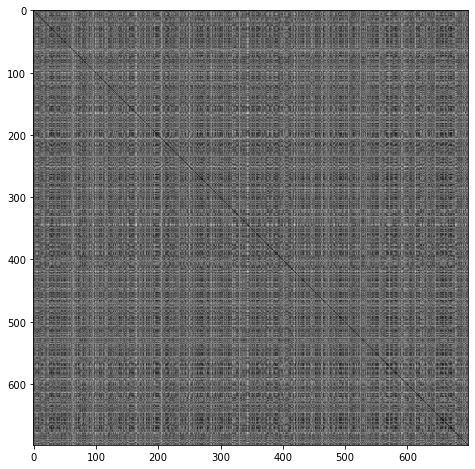

In [647]:
# Show shortest distance matrix D (Manhattan distance)
plt.imshow(D_m, cmap='gray')

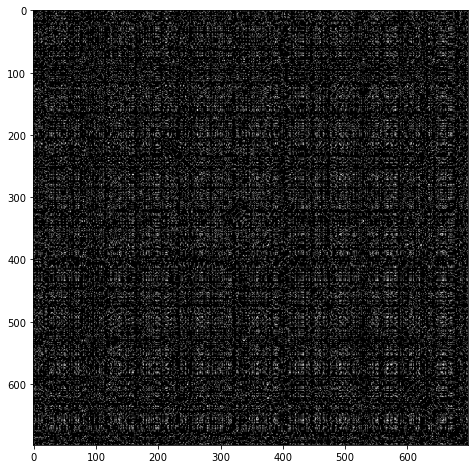

In [648]:
# Show original adjacent matrix Bb
plt.imshow(B_m, cmap='gray')

Text(0.5, 1.0, 'First two embeddings using Manhattan Distance, k=10')

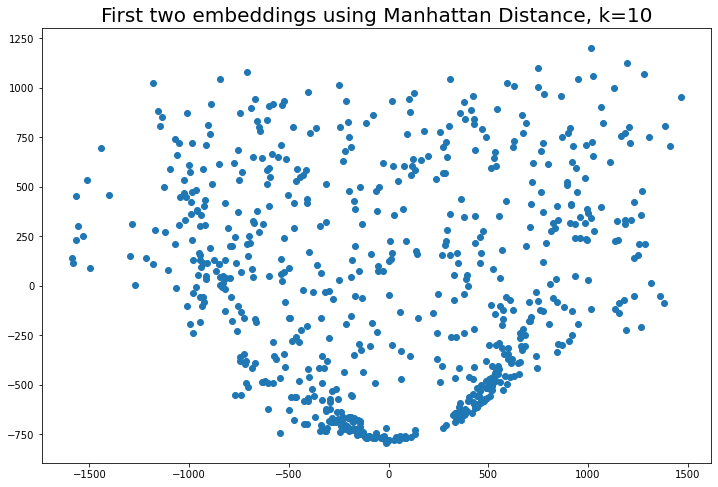

In [652]:
# Plot the first 2 embeddings as scatter plot
plt.scatter(Z_m[:,0], Z_m[:,1])
plt.title('First two embeddings using Manhattan Distance, k=10', fontsize=20)

In [650]:
plot_components(Z_m)

### Answer: 2.4 PCA

In [569]:
# Arry 
arr_img_t.shape

(698, 4096)

In [576]:
# Calcualte mean of each image array
mu_2 = arr_img_t.mean(axis=1)
mu_2.shape

(698,)

In [592]:
# calcualte new zero mean matrix 
arr_xc = np.subtract(arr_img_t.T, mu_2)
arr_xc.shape

(4096, 698)

In [594]:
# Calcualte coveriance matrix
arr_C = np.dot(arr_xc, arr_xc.T)/arr_img_t.shape[0]
arr_C.shape

(4096, 4096)

In [595]:
# Perform SVD to calcualte eigenvaluea and eigenvector
U4, Sigma4, Vh4 = ll.svd(arr_C)

In [596]:
k = 2

# U4 as the eigenvector 
U4 = U4.real

# Eigenvalue
Sigma4 = Sigma4.real

In [598]:
# Calcualte the first two principle components based on the first weighted vector
Sigma4 = Sigma4.reshape(-1,1)

dim1 = np.dot(U4[:,0].T, arr_xc)/math.sqrt(Sigma4[0])
dim2 = np.dot(U4[:,1].T, arr_xc)/math.sqrt(Sigma4[1])

In [651]:
# Plot the first 2 principle components as scatter plot
plt.scatter(dim1, dim2)
plt.title('First two embeddings using PCA', fontsize=20)

Text(0.5, 1.0, 'First two embeddings using PCA')

In [600]:
# plot the principle components with sample images
Z = np.vstack((dim1, dim2)).T

plot_components(Z)

## 3. (Bonus) Eigenfaces and simple face recognition [15 points]

This question is a simplified illustration of using PCA for face recognition. We will use a subset of data from the famous Yale Face dataset. You will have to perform downsampling of the image by a factor of 4 to turn them into a lower resolution image as a preprocessing (e.g., reduce a picture of size 16-by-16 to 4-by-4). In this question, you can implement your own code or call packages. 

First, given a set of images for each person, we generate the eigenface using these images. You will treat one picture from the same person as one data point for that person. Note that you will first vectorize each image, which was originally a matrix. Thus, the data matrix (for each person) is a matrix; each row is a vectorized picture. You will find weight vectors to combine the pictures to extract different 'eigenfaces' that correspond to that person's pictures' first few principal components. 

### 3.1
(10 points) Perform analysis on the Yale face dataset for Subject 1 and Subject 2, respectively, using all the images EXCEPT for the two pictures named **subject01-test.gif** and **subject02-test.gif**. Plot the first 6 eigenfaces for each subject. When visualizing, please reshape the eigenvectors into proper images. Please explain can you see any patterns in the top 6 eigenfaces?

### 3.2
(5 points) Now we will perform a simple face recognition task. 

Face recognition through PCA is proceeded as follows. Given the test image **subject01-test.gif** and **subject02-test.gif**, first downsize by a factor of 4 (as before), and vectorize each image. Take the top eigenfaces of Subject 1 and Subject 2, respectively. Then we calculate the *normalized inner product score* of the 2 vectorized test images with the vectorized eigenfaces:

$$s_{ij} =\frac{\textsf{(eigenface})_i^T \textsf{(test image)}_j}{\|\textsf{(eigenface}_i)\| \cdot\|\textsf{(test image)}_j\|}$$

Report all four scores: $s_{ij}$, $i = 1, 2$, $j = 1, 2.$ Explain how to recognize the faces of the test images using these scores. Explain if face recognition can work well and discuss how we can improve it, possibly. 



In [29]:
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
from matplotlib.image import imread
import math
from PIL import Image
import os
import seaborn as sns; sns.set()
import glob

In [30]:
# Read all the subject01 files except subject01-test
images_1 = glob.glob(r'yalefaces/subject01.*')
images_1                   

['yalefaces/subject01.happy.gif',
 'yalefaces/subject01.rightlight.gif',
 'yalefaces/subject01.noglasses.gif',
 'yalefaces/subject01.sad.gif',
 'yalefaces/subject01.surprised.gif',
 'yalefaces/subject01.glasses.gif',
 'yalefaces/subject01.normal.gif',
 'yalefaces/subject01.wink.gif',
 'yalefaces/subject01.sleepy.gif',
 'yalefaces/subject01.leftlight.gif']

In [31]:
# Read all the subject02 except subject02-test
images_2 = glob.glob(r'yalefaces/subject02.*')
images_2  

['yalefaces/subject02.glasses.gif',
 'yalefaces/subject02.noglasses.gif',
 'yalefaces/subject02.wink.gif',
 'yalefaces/subject02.sad.gif',
 'yalefaces/subject02.sleepy.gif',
 'yalefaces/subject02.rightlight.gif',
 'yalefaces/subject02.normal.gif',
 'yalefaces/subject02.happy.gif',
 'yalefaces/subject02.leftlight.gif']

In [32]:
def image_load(file_name):
    # Read image into ndarray
    img = Image.open(file_name)
    img_array = np.array(img)
    #print('Read image file in ndarray with shape: {}'.format(img_array.shape))
    return img_array

image yalefaces/subject01.happy.gif dimension: (243, 320)
image yalefaces/subject01.rightlight.gif dimension: (243, 320)
image yalefaces/subject01.noglasses.gif dimension: (243, 320)
image yalefaces/subject01.sad.gif dimension: (243, 320)
image yalefaces/subject01.surprised.gif dimension: (243, 320)
image yalefaces/subject01.glasses.gif dimension: (243, 320)
image yalefaces/subject01.normal.gif dimension: (243, 320)
image yalefaces/subject01.wink.gif dimension: (243, 320)
image yalefaces/subject01.sleepy.gif dimension: (243, 320)
image yalefaces/subject01.leftlight.gif dimension: (243, 320)


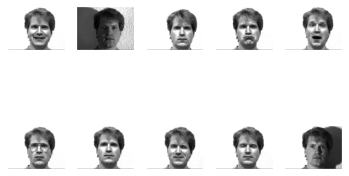

In [33]:
fig, ax = plt.subplots(2, 5, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(image_load(images_1[i]), cmap='gray')
    print('image {} dimension: {}'.format(images_1[i], image_load(images_1[i]).shape))

image yalefaces/subject02.glasses.gif dimension: (243, 320)
image yalefaces/subject02.noglasses.gif dimension: (243, 320)
image yalefaces/subject02.wink.gif dimension: (243, 320)
image yalefaces/subject02.sad.gif dimension: (243, 320)
image yalefaces/subject02.sleepy.gif dimension: (243, 320)
image yalefaces/subject02.rightlight.gif dimension: (243, 320)
image yalefaces/subject02.normal.gif dimension: (243, 320)
image yalefaces/subject02.happy.gif dimension: (243, 320)
image yalefaces/subject02.leftlight.gif dimension: (243, 320)


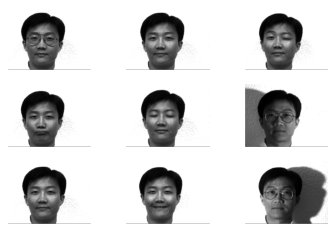

In [34]:
fig, ax = plt.subplots(3, 3, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(image_load(images_2[i]), cmap='gray')
    print('image {} dimension: {}'.format(images_2[i], image_load(images_2[i]).shape))

#### Preprocessing: Downsampling by factor of 4

In [35]:
from skimage.transform import rescale, resize, downscale_local_mean

# Create function to downsampling images
def img_downscale(img_arr, factor=4):
    img_arr = img_arr.astype('float')
    image_downscaled = downscale_local_mean(img_arr, (factor, factor))
    # the downscale_local_mean returns int, convert it back to uint8 in order to show the image
    img_down = image_downscaled.astype(np.uint8)
    # plt.imshow(sample_img_down, cmap='gray')
    return img_down

image yalefaces/subject01.happy.gif dimension: (61, 80)
image yalefaces/subject01.rightlight.gif dimension: (61, 80)
image yalefaces/subject01.noglasses.gif dimension: (61, 80)
image yalefaces/subject01.sad.gif dimension: (61, 80)
image yalefaces/subject01.surprised.gif dimension: (61, 80)
image yalefaces/subject01.glasses.gif dimension: (61, 80)
image yalefaces/subject01.normal.gif dimension: (61, 80)
image yalefaces/subject01.wink.gif dimension: (61, 80)
image yalefaces/subject01.sleepy.gif dimension: (61, 80)
image yalefaces/subject01.leftlight.gif dimension: (61, 80)


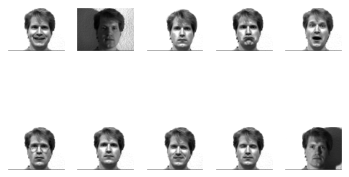

In [36]:
fig, ax = plt.subplots(2, 5, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(img_downscale(image_load(images_1[i])), cmap='gray')
    print('image {} dimension: {}'.format(images_1[i], img_downscale(image_load(images_1[i])).shape))

In [37]:
fig, ax = plt.subplots(3, 3, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(img_downscale(image_load(images_2[i])), cmap='gray')
    print('image {} dimension: {}'.format(images_2[i], img_downscale(image_load(images_2[i])).shape))

image yalefaces/subject02.glasses.gif dimension: (61, 80)
image yalefaces/subject02.noglasses.gif dimension: (61, 80)
image yalefaces/subject02.wink.gif dimension: (61, 80)
image yalefaces/subject02.sad.gif dimension: (61, 80)
image yalefaces/subject02.sleepy.gif dimension: (61, 80)
image yalefaces/subject02.rightlight.gif dimension: (61, 80)
image yalefaces/subject02.normal.gif dimension: (61, 80)
image yalefaces/subject02.happy.gif dimension: (61, 80)
image yalefaces/subject02.leftlight.gif dimension: (61, 80)


### 3.1

#### Vectorize image and build image matrix

In [38]:
# create function to transform the image matrix into vector
# per question, each row is a vectorized picture so the image matrix should be converted to a 1 row vector
def vectorize_image(img_arr):
    # Convert to float
    img_arr = img_arr.astype('float')
    return img_arr.reshape(1, -1)

In [39]:
# create function to create matrix from all the pics 
# in person's matrix, each row is a vectorized pics
def img_matrix(pic_files, down_sample_factor=4):
    img_ls = []
    for pic in pic_files:
        # load pictures into array
        img_array = image_load(pic)
        # perform downsampling by givin factor
        img_down = img_downscale(img_array, factor=down_sample_factor)
        # convert img array to one row vector
        img_vec = vectorize_image(img_down)
        img_ls.append(img_vec)
    
    # stack all the rows into one matrix
    return np.vstack(img_ls)

In [40]:
# build image matrix for subject 1 and subject 2
img_matrix_1 = img_matrix(images_1, down_sample_factor=4)
img_matrix_2 = img_matrix(images_2, down_sample_factor=4)

In [41]:
img_matrix_1.shape

(10, 4880)

In [42]:
img_matrix_2.shape

(9, 4880)

#### Create eigenfaces

In [43]:
def img_covariance_matrix(img_matrix):
    # 1. calculate mean of each row for each image
    sub_mean = img_matrix.mean(axis=1).reshape(-1,1)
    
    # 2. subtract the mean from each column so the mean of each row is zero
    img_matrix_x = img_matrix-sub_mean
    
    # 3. calculate coveriance_matrix
    C= np.dot(img_matrix_x.T, img_matrix_x)
    #/img_matrix.shape[0]
    
    return C

In [44]:
C1 = img_covariance_matrix(img_matrix_1)
C1.shape

(4880, 4880)

In [45]:
C2 = img_covariance_matrix(img_matrix_2)
C2.shape

(4880, 4880)

#### Perform SVD to find the eigenvectors and eigenvalues

In [46]:
U1, Sigma1, _ = ll.svd(C1)

In [47]:
# find the first 6 eigenfaces from eigenvectors for subject 1
eigenfaces1 = U1[:, :6]

In [48]:
U2, Sigma2, _ = ll.svd(C2)

In [62]:
# find the first 6 eigenfaces from eigenvectors for subject 2
eigenfaces2 = U2[:, :6]

In [50]:
# create function to convert vectorized image back into original image
def array_to_img(img_array, ori_img):
    img_array = np.round(img_array).astype(int)
    img_array = img_array.reshape(ori_img.shape)
    img_array = img_array.astype(np.uint8)
    # new_image = Image.fromarray(img_array)
    # display(new_image)
    return img_array

In [51]:
# use as original image array sample
# so we can use function array_to_img to convert the eigenface array to image array based on the shape of below sample image
sample_down_img = img_downscale(image_load(images_1[0]))

In [52]:
# create function to convert each eigenface back to image array
def eigenface_img(eigenfaces):
    eigenfaces_ls = []
    for i in range(eigenfaces.shape[1]):
        # multiply -1 to make the black color into white
        eigenface_i = -1*eigenfaces[:,i]

        # normalize eigenvector to proper range from 0-255
        eigenface_i = (eigenface_i - eigenface_i.min())/(eigenface_i.max()-eigenface_i.min())*255   
        eigenface_i_img = array_to_img(eigenface_i, sample_down_img)
        eigenfaces_ls.append(eigenface_i_img)
    return eigenfaces_ls

### Eigenface Images for Subject 1

In [53]:
eigenfaces_1 = eigenface_img(eigenfaces1)

In [54]:
fig, ax = plt.subplots(2, 3, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(eigenfaces_1[i], cmap='gray')

### Eigenface Images for Subject 2

In [63]:
eigenfaces_2 = eigenface_img(eigenfaces2)

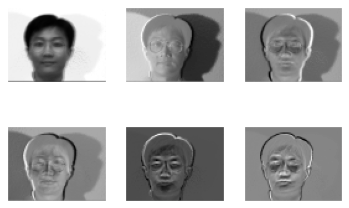

In [56]:
fig, ax = plt.subplots(2, 3, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(eigenfaces_2[i], cmap='gray')

### 3.2 Face recognition

In [916]:
# Read subject01-test
test_1 = glob.glob(r'yalefaces/subject01-*')
test_1

['yalefaces/subject01-test.gif']

In [917]:
# Read subject02-test
test_2 = glob.glob(r'yalefaces/subject02-*')
test_2

['yalefaces/subject02-test.gif']

In [922]:
# vectorize test 1 into 1 row vector
test_1_vec = img_matrix(test_1)

In [921]:
# vectorize test 2 into 1 row vector
test_2_vec = img_matrix(test_2)

#### Score for subject

In [952]:
def eigen_score(eigenvector, test_img):
    # calculate inner product based on the formula given
    A = eigenvector.reshape(1,-1) @ test_img.T
    B = ll.norm(eigenvector) * ll.norm(test_img.T)
    S = A/B
    return S.item()

In [953]:
S11 = eigen_score(U1[:,0], test_1_vec)
S11

-0.37666856936240417

In [957]:
S12 = eigen_score(U1[:,0], test_2_vec)
S12

-0.09412185963577685

In [958]:
S21 = eigen_score(U2[:,0], test_1_vec)
S21

-0.12242697151902791

In [959]:
S22 = eigen_score(U2[:,0], test_2_vec)
S22

-0.3905773583760458